<a href="https://colab.research.google.com/github/minhbao1705/Keras-tutorial/blob/main/Chap2_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here are a few examples to get you started

In this examples notebook, you will also find example models for real dataset:

* CIFAR 10 small images classification: Convolutional Neural Network (CNN) with realtime data augmentation.
* IMDB movie review sentiment classification: LSTM over sequences of words.
* Reuters newswires topic classification: Multilayer Perceptron (MLP).
* MNIST handwritten digits classification: MLP & CNN.
* Character-level text generation with LSTM.

## **Multilayer Perceptron (MLP) for multi-class softmax classification**

In [ ]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)

x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

# Create model
model = Sequential()

'''
  Dense(64) is a fully-connected layer with 64 hidden units.
  in the first layer, you must specify the expected input data shape:
  here, 20-dimensional vectors.
'''
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)

score = model.evaluate(x_test, y_test, batch_size=128)
print("Score: ", score)

## **MLP for binary classification**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Generate data
x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))

x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

# Create model
model = Sequential()

model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Fit model
model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)

# Evaluate
score = model.evaluate(x_test, y_test, batch_size=128)
print("Score: ", score)

## **VGG-like convnet**

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# Generate data
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

# Create model
model = Sequential()
'''
  input: 100x100 images with 3 channels -> (100, 100, 3) tensors
  this applies 32 convolution filters of size 3x3 each
'''
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)

# Compile
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Fit
model. fit(x_train, y_train, batch_size=32, epochs=10)

# Evaluate
score = model.evaluate(x_test, y_test, batch_size=32)
print('Score: ', score)

## **Sequence classification with LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

max_features = 1024

# Create model
model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Fit
model.fit(x_train, y_train, batch_size=16, epochs=10)

# Evaluate
score = model.evaluate(x_test, y_test, batch_size=16)
print('Score: ', score)

## **Sequence classification with 1D convolutions**

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

seq_length = 64

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(seq_length, 100)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(loss='binary_crossentropy',
              optimizer = 'rmsprop',
              metrics=['accuracy'])

# Fit
model.fit(x_train, y_train, batch_size=16, epochs=10)

# Evaluate
score = model.evaluate(x_test, y_test, batch_size=16)
print("Score: ", score)

## **Stacked LSTM for sequence classification**

In this model, we stack 3 LSTM layers on top of each other, making the model capable of learning higher-level temporal representations.

The first two LSTMs return their full output sequences, but the last one only returns the last step in its output sequence, thus dropping the temporal dimension.

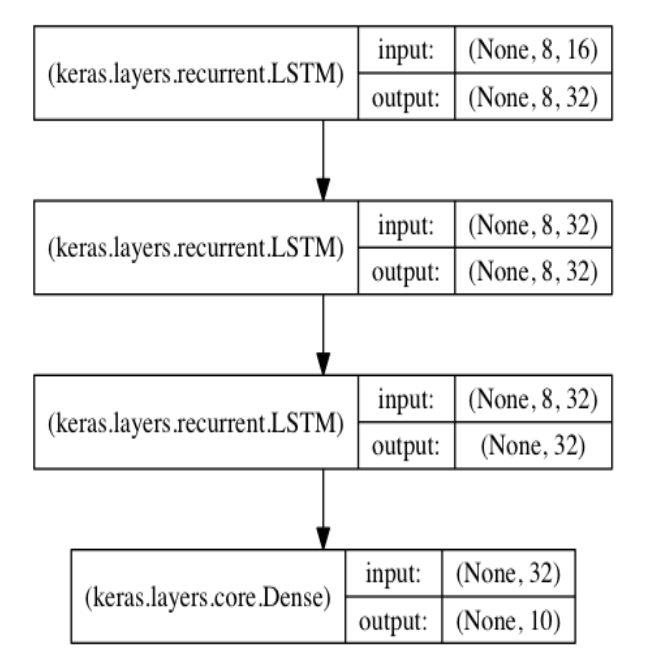

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim))) # return a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True)) # return a sequence of vectors of dimension 32
model.add(LSTM(32)) # return a single vector of dimension 32
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

# Fit
model.fit(x_train, y_train,
          batch_size=64, epochs=10,
          validation_data=(x_val, y_val))

## **Same stacked LSTM model, rendered "stateful"**

A stateful recurrent model is one for which the internal states (memories) abtained after processing a batch of samples are reused as initial states for the samples of the next batch. This allows to process longer sequences while keeping computational complexity manageable.

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10
batch_size = 32

# Expected input batch shape: (batch_size, timesteps, data_dim)
# Note that we have to provide the full batch_input_shape since the network is stateful
# The sample of index i in batch k is the follow-up for the sample i in batch k-1
model = Sequential()
model.add(LSTM(32, return_sequences=True, stateful=True,
               batch_input_shape=(batch_size, timesteps, data_dim)))
model.add(LSTM(32, return_sequences=True, stateful=True))
model.add(LSTM(32, stateful=True))
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate data
x_train = np.random.random((batch_size*10, timesteps, data_dim))
y_train = np.random.random((batch_size*10, num_classes))

x_val = np.random.random((batch_size*3, timesteps, data_dim))
y_val = np.random.random((batch_size*3, num_classes))

# Fit
model.fit(x_train, y_train,
          batch_size=batch_size, epochs=10, shuffle=False,
          validation_data=(x_val, y_val))